In [1]:
import pandas
import numpy
import matplotlib
%matplotlib inline 

In [2]:
data = pandas.read_pickle("output.pandas.pkl")

In [3]:
data = data.replace("",numpy.nan)

In [4]:
description = data.describe()

In [5]:
dictDes = dict(description)

In [6]:
shape = data.shape
shape

(2268905, 205)

In [7]:
totalRows = shape[0]
totalRows

2268905

In [8]:
percentValid = []
sampleNames = []
for key in list(dictDes.keys()):
    percentValid.append(dictDes[key][0]/totalRows)
    sampleNames.append(key)

In [9]:
validMatrix = pandas.DataFrame(percentValid, sampleNames)
validMatrix.head()

,0
AT22_index_21_trimmed,0.974517
AT16_index_23_trimmed,0.947785
AT18_index_22_trimmed,0.963523
AT34_index_22_trimmed,0.944958
AT2_index_20_trimmed,0.724959


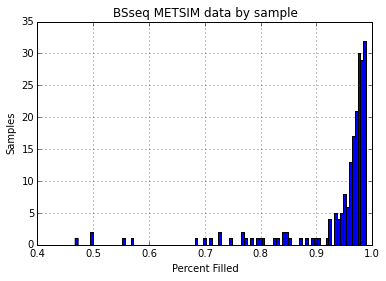

In [10]:
validPlot = validMatrix[0].hist(bins = 100)
validPlot.set_title("BSseq METSIM data by sample")
validPlot.set_xlabel("Percent Filled")
validPlot.set_ylabel("Samples")

In [11]:
totalColumns = data.shape[1]
dCount = dict(data.count(axis=1))
locusNames = []
percentages = []
for key in list(dCount.keys()):
    locusNames.append(key)
    percentages.append(dCount[key]/totalColumns)
byLocus = pandas.DataFrame(percentages, locusNames)
byLocus.head()

,0
17:73083386,0.946341
22:50122802,0.980488
13:112848692,0.951220
20:2854354,0.980488
4:8197077,1.000000


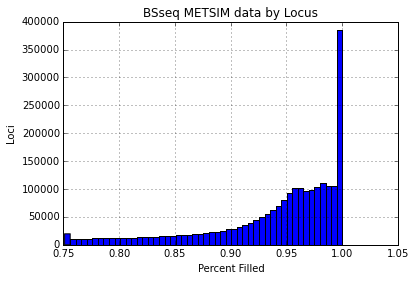

In [12]:
validPlot2 = byLocus[0].hist(bins = 50)
validPlot2.set_title("BSseq METSIM data by Locus")
validPlot2.set_xlabel("Percent Filled")
validPlot2.set_ylabel("Loci")

In [13]:
#deleting any rows with less than 93 percent filling
shape = data.shape
totalRows = shape[0]
minFill = int(totalRows * .93)
data.dropna(axis = 1, thresh=int(totalRows*.93), inplace=True)
minFill

2110081

In [14]:
data.shape

(2268905, 170)

In [15]:
description = data.describe()
dictDes = dict(description)
shape = data.shape
shape
totalRows = shape[0]
totalRows

2268905

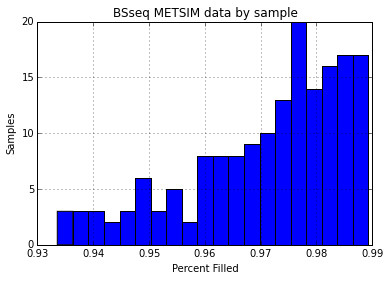

In [16]:
percentValid = []
sampleNames = []
for key in list(dictDes.keys()):
    percentValid.append(dictDes[key][0]/totalRows)
    sampleNames.append(key)
validMatrix = pandas.DataFrame(percentValid, sampleNames)
validPlot = validMatrix[0].hist(bins = 20)
validPlot.set_title("BSseq METSIM data by sample")
validPlot.set_xlabel("Percent Filled")
validPlot.set_ylabel("Samples")

In [17]:
totalColumns = data.shape[1]
dCount = dict(data.count(axis=1))
locusNames = []
percentages = []
for key in list(dCount.keys()):
    locusNames.append(key)
    percentages.append(dCount[key]/totalColumns)
byLocus = pandas.DataFrame(percentages, locusNames)
byLocus.head()

,0
17:73083386,0.976471
22:50122802,1.000000
13:112848692,0.988235
20:2854354,1.000000
4:8197077,1.000000


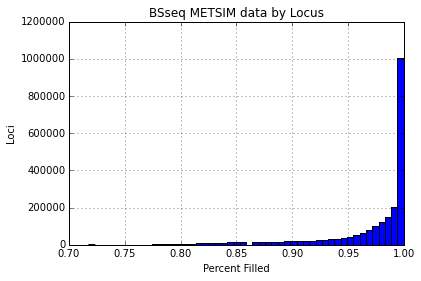

In [18]:
validPlot2 = byLocus[0].hist(bins = 50)
validPlot2.set_title("BSseq METSIM data by Locus")
validPlot2.set_xlabel("Percent Filled")
validPlot2.set_ylabel("Loci")

In [19]:
data.dropna(axis = 0, how='any', inplace=True)
data.shape

(1005419, 170)

In [20]:
matrix = data.as_matrix()
inverse = numpy.linalg.pinv(matrix)

In [21]:
inverse

array([[  4.00610785e-06,  -9.48743757e-06,  -3.44530315e-05, ...,
          5.90448797e-07,   2.39637386e-07,   1.41695745e-07],
       [ -2.37804714e-05,  -8.44513402e-06,  -3.52814632e-05, ...,
          5.48250595e-07,  -5.55747820e-07,   7.43639572e-08],
       [  7.94115058e-07,  -2.27300839e-05,  -3.67214213e-06, ...,
         -3.23728600e-07,   2.76030120e-07,   1.46947970e-07],
       ..., 
       [ -8.00492889e-08,   1.90837833e-06,   6.73469751e-06, ...,
         -3.35493321e-07,   1.18451460e-07,   1.12246967e-07],
       [  4.13960886e-06,  -4.09930413e-08,   2.13299413e-05, ...,
         -6.86456245e-07,  -6.17911976e-07,   1.27594096e-07],
       [  4.07086225e-06,   2.15526290e-06,  -3.50185334e-05, ...,
         -3.80032907e-07,   3.55597346e-07,  -4.25529680e-07]])

In [22]:
inverse.shape

(170, 1005419)